In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
train = pd.read_csv("C:\\Users\\Vadim_Katsemba\\Downloads\\Digitstrain.csv")
test = pd.read_csv("C:\\Users\\Vadim_Katsemba\\Downloads\\Digitstest.csv")

In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train["label"].values.astype('int32')
X_train = train.drop(labels = ["label"],axis = 1).values.astype('float32')
X_test = test.values.astype('float32')

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [7]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

Using TensorFlow backend.


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=123)

In [9]:
import keras
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation  
from keras.layers.convolutional import Conv2D, MaxPooling2D  
from keras.constraints import maxnorm  
from keras.utils import np_utils 

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))  
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))  
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))  
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))  
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same'))  
model.add(Activation('relu'))  
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Flatten())  
model.add(Dropout(0.2))
model.add(Dense(256, kernel_constraint=maxnorm(3)))  
model.add(Activation('relu'))  
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(128, kernel_constraint=maxnorm(3)))  
model.add(Activation('relu'))  
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(10))  
model.add(Activation('softmax'))          

model.compile(loss=keras.losses.categorical_crossentropy,  optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_val, Y_val))
accuracy = model.evaluate(X_val, Y_val, verbose=0)
print('Test accuracy:', accuracy[1])

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 182s 5ms/step - loss: 0.2357 - acc: 0.9285 - val_loss: 0.0567 - val_acc: 0.9826
Epoch 2/10
37800/37800 [==============================] - 177s 5ms/step - loss: 0.0720 - acc: 0.9787 - val_loss: 0.0612 - val_acc: 0.9814
Epoch 3/10
37800/37800 [==============================] - 176s 5ms/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.0439 - val_acc: 0.9864
Epoch 4/10
37800/37800 [==============================] - 179s 5ms/step - loss: 0.0419 - acc: 0.9876 - val_loss: 0.0330 - val_acc: 0.9900
Epoch 5/10
37800/37800 [==============================] - 176s 5ms/step - loss: 0.0353 - acc: 0.9889 - val_loss: 0.0365 - val_acc: 0.9883
Epoch 6/10
37800/37800 [==============================] - 176s 5ms/step - loss: 0.0301 - acc: 0.9907 - val_loss: 0.0412 - val_acc: 0.9876
Epoch 7/10
37800/37800 [==============================] - 177s 5ms/step - l

In [11]:
pred = model.predict(X_test)
Y_classes = pred.argmax(axis=-1)
res = pd.DataFrame()
res['ImageId'] = list(range(1,28001))
res['Label'] = Y_classes
res.to_csv("DigitsNN5.csv", index = False)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.15, 
                             shear_range=0.15)

In [12]:
model_aug = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
                                 validation_data=(X_val, Y_val),
                                 steps_per_epoch = X_train.shape[0] // 128,
                                 epochs=7)

Epoch 1/7
295/295 [==============================] - 174s 591ms/step - loss: 0.2684 - acc: 0.9298 - val_loss: 0.0258 - val_acc: 0.9919
Epoch 2/7
295/295 [==============================] - 174s 590ms/step - loss: 0.1109 - acc: 0.9669 - val_loss: 0.0256 - val_acc: 0.9919
Epoch 3/7
295/295 [==============================] - 175s 593ms/step - loss: 0.0986 - acc: 0.9708 - val_loss: 0.0199 - val_acc: 0.9933
Epoch 4/7
295/295 [==============================] - 173s 587ms/step - loss: 0.0834 - acc: 0.9757 - val_loss: 0.0234 - val_acc: 0.9936
Epoch 5/7
295/295 [==============================] - 174s 589ms/step - loss: 0.0725 - acc: 0.9789 - val_loss: 0.0572 - val_acc: 0.9829
Epoch 6/7
295/295 [==============================] - 173s 588ms/step - loss: 0.0680 - acc: 0.9807 - val_loss: 0.0255 - val_acc: 0.9919
Epoch 7/7
295/295 [==============================] - 174s 589ms/step - loss: 0.0662 - acc: 0.9804 - val_loss: 0.0163 - val_acc: 0.9955


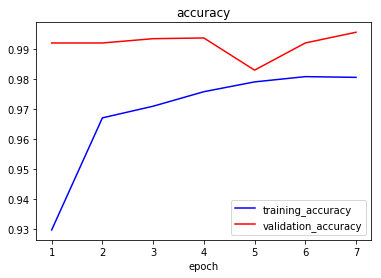

In [13]:
epochs = [i for i in range(1, len(model_aug.history['loss'])+1)]

plt.plot(epochs, model_aug.history['acc'], color='blue', label="training_accuracy")
plt.plot(epochs, model_aug.history['val_acc'], color='red',label="validation_accuracy")
plt.legend(loc='best')
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

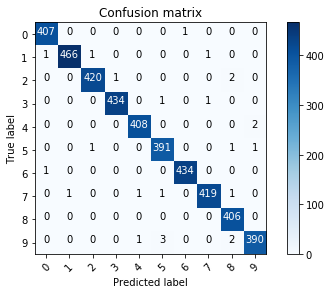

In [39]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_val,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes = range(10)) 

4200